# Exercise: NEISS, Question Set C

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [60]:
import pandas as pd
import re

In [2]:
df= pd.read_csv("nss15.tsv", sep= "\t", error_bad_lines=False, dtype={'prod1':str,'prod2':str})

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

### Check that your dataframe has 357727 rows and 19 columns.

In [5]:
df.shape

(357727, 19)

### List the columns and their data types

In [6]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1           object
prod2           object
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [7]:
df.columns

#fmv has to do with fire involvement 


Index(['CPSC Case #', 'trmt_date', 'psu', 'weight', 'stratum', 'age', 'sex',
       'race', 'race_other', 'diag', 'diag_other', 'body_part', 'disposition',
       'location', 'fmv', 'prod1', 'prod2', 'narr1', 'narr2'],
      dtype='object')

# Cleaning up a column

Take a look at the **sex** column. How many rows of each sex are there?

In [8]:
df['sex']

0         1
1         1
2         2
3         1
4         2
5         2
6         1
7         1
8         1
9         2
10        1
11        2
12        1
13        2
14        1
15        1
16        2
17        1
18        2
19        2
20        2
21        1
22        1
23        1
24        2
25        2
26        2
27        1
28        1
29        1
         ..
357697    1
357698    2
357699    2
357700    1
357701    2
357702    2
357703    2
357704    1
357705    2
357706    2
357707    2
357708    2
357709    1
357710    1
357711    1
357712    1
357713    1
357714    2
357715    2
357716    2
357717    2
357718    2
357719    2
357720    2
357721    1
357722    1
357723    2
357724    1
357725    2
357726    2
Name: sex, Length: 357727, dtype: int64

In [9]:
df['sex'].value_counts()

1    195071
2    162654
0         2
Name: sex, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 7 of the column definitions file.

In [10]:
# df.sex.replace(1, "Male")
# df.sex.replace(2, "Female")
# df.sex.replace(0, "Not Recorded")
# df.head()

df.sex.replace(2, "Female", inplace=True)
df.sex.replace(1, "Male", inplace=True)
df.sex.replace(0, "Not Recorded", inplace=True)
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,NaN,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Confirm you have 195071 male, 162654 female, and 2 "Not Recorded."

In [11]:
df['sex'].value_counts()

Male            195071
Female          162654
Not Recorded         2
Name: sex, dtype: int64

## Graph the number of men and women, but don’t included the “Not Recorded” records

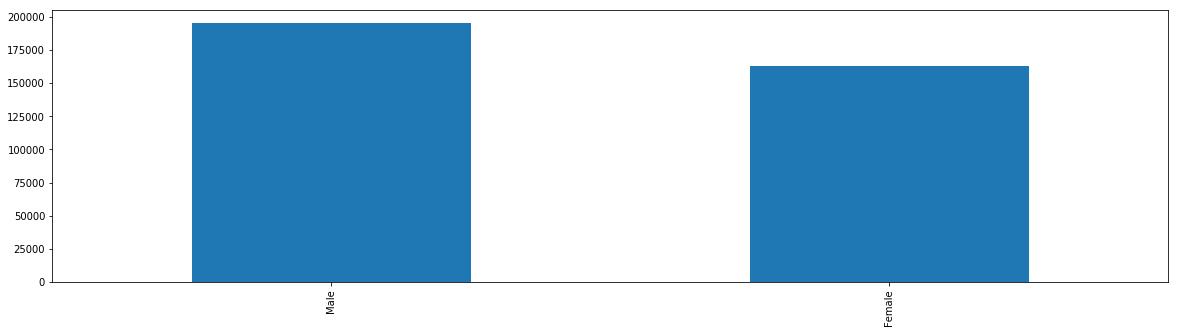

In [12]:
df[df['sex']!= 'Not Recorded']['sex'].value_counts().plot(kind='bar',figsize=(20,5))

In [13]:
df[df.sex != 'Not Recorded'].sex.value_counts()

Male      195071
Female    162654
Name: sex, dtype: int64

## "Not recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [14]:
import numpy as np
np.nan

nan

In [15]:
df.sex.replace("Not Recorded", np.nan, inplace=True)

In [16]:
df.sex.value_counts()

Male      195071
Female    162654
Name: sex, dtype: int64

## Graph the count of men and women, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

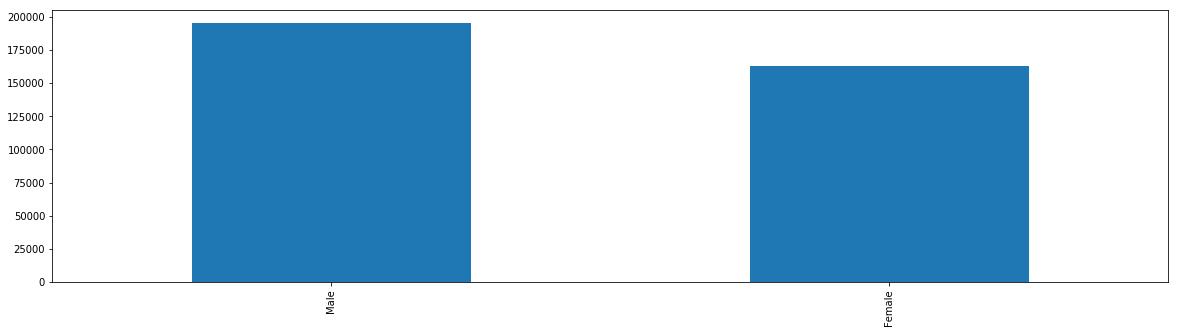

In [17]:
df['sex'].value_counts().plot(kind='bar',figsize=(20,5))

# Wall punching

## Find every instance where the narrative includes punching a wall

Include phrases like "punched a wall" or "punch wall" or "punched ten thousand walls." Do not type them each individually. How do you do that?????

In [18]:
# df[df['narr1'].strcontains("punch")(regex=True)]

In [19]:
df[df.narr1.str.contains("punch.*WALL",regex=True, case=False)]
#find fell of bike, bicycle
#f.[df.narr1.str.contains("F[AE]LL.*BI[CK]")]
#use a regular expression

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
246,150532226,05/07/2015,63,97.9239,M,38,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN
582,150954076,09/16/2015,22,15.7762,V,13,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,"PT PUNCHED A WALL. FRACTURE METACARPAL, RIGHT,...",NaN
604,150541260,04/09/2015,53,15.0591,V,22,Male,1,NaN,71,HAND INJURY,82,1,1,0,1884,NaN,22YOM-HAND INJURY-PUNCHED A CEMENT WALL IN ANG...,NaN
704,151017458,10/05/2015,61,16.5650,V,15,Female,1,NaN,53,NaN,82,1,1,0,1884,NaN,15 YOF C/O RIGHT HAND PAIN SINCE PUNCHING A WA...,DX: CONTUSION OF HAND
741,150433154,04/02/2015,91,15.0591,V,33,Male,1,NaN,57,NaN,82,1,0,0,1884,NaN,33YOM PUNCHED A WALL X1 WEEK AGO W/ SHARP PAIN...,"DX: ACUTE CLOSED FX OF FIFTH METACARPAL, BOXER..."
782,150805902,07/22/2015,3,74.8813,L,28,Male,0,NaN,71,HAND INJ,82,1,0,0,1884,NaN,28YOM PUNCHED A WALL AND INJ RT HAND,NaN
1098,150455805,03/27/2015,93,15.0591,V,25,Female,1,NaN,53,NaN,82,1,0,0,1884,NaN,25 YOF PUNCHED A WALL.,DX: R HAND CONT.
1571,150519707,04/21/2015,77,15.0591,V,14,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,14YOM SUST FX TO HAND WHEN HE PUNCHED A WALL*,NaN
1616,151112964,09/21/2015,26,15.7762,V,16,Male,2,NaN,53,NaN,82,1,5,0,1884,NaN,16 YOM CONTUSION TO HAND AFTER PUNCHING A WALL,NaN
1660,150446653,04/14/2015,33,15.0591,V,52,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,52 YOM PUNCHED WALL L HAND DX: FX 5TH MC,NaN


## Graph the gender distribution of wall-punching.

In [20]:


wall_punch= df[df.narr1.str.contains("punch.*WALL",regex=True, case=False)]
wall_punch

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
246,150532226,05/07/2015,63,97.9239,M,38,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN
582,150954076,09/16/2015,22,15.7762,V,13,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,"PT PUNCHED A WALL. FRACTURE METACARPAL, RIGHT,...",NaN
604,150541260,04/09/2015,53,15.0591,V,22,Male,1,NaN,71,HAND INJURY,82,1,1,0,1884,NaN,22YOM-HAND INJURY-PUNCHED A CEMENT WALL IN ANG...,NaN
704,151017458,10/05/2015,61,16.5650,V,15,Female,1,NaN,53,NaN,82,1,1,0,1884,NaN,15 YOF C/O RIGHT HAND PAIN SINCE PUNCHING A WA...,DX: CONTUSION OF HAND
741,150433154,04/02/2015,91,15.0591,V,33,Male,1,NaN,57,NaN,82,1,0,0,1884,NaN,33YOM PUNCHED A WALL X1 WEEK AGO W/ SHARP PAIN...,"DX: ACUTE CLOSED FX OF FIFTH METACARPAL, BOXER..."
782,150805902,07/22/2015,3,74.8813,L,28,Male,0,NaN,71,HAND INJ,82,1,0,0,1884,NaN,28YOM PUNCHED A WALL AND INJ RT HAND,NaN
1098,150455805,03/27/2015,93,15.0591,V,25,Female,1,NaN,53,NaN,82,1,0,0,1884,NaN,25 YOF PUNCHED A WALL.,DX: R HAND CONT.
1571,150519707,04/21/2015,77,15.0591,V,14,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,14YOM SUST FX TO HAND WHEN HE PUNCHED A WALL*,NaN
1616,151112964,09/21/2015,26,15.7762,V,16,Male,2,NaN,53,NaN,82,1,5,0,1884,NaN,16 YOM CONTUSION TO HAND AFTER PUNCHING A WALL,NaN
1660,150446653,04/14/2015,33,15.0591,V,52,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,52 YOM PUNCHED WALL L HAND DX: FX 5TH MC,NaN


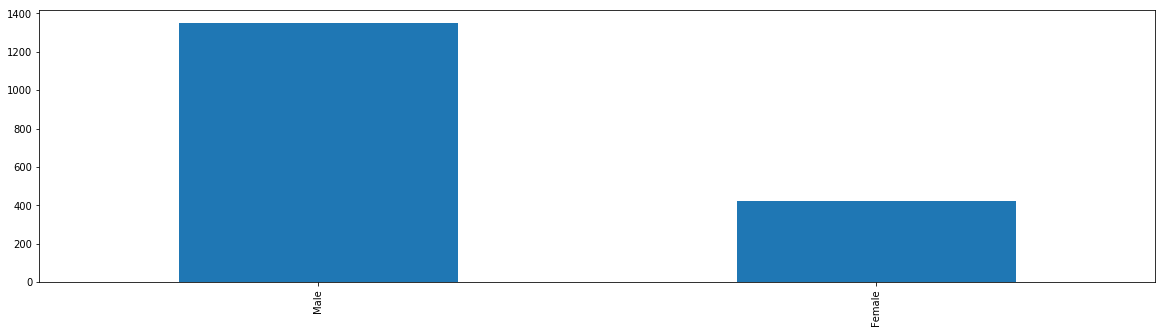

In [21]:
wall_punch['sex'].value_counts().plot(kind='bar',figsize=(20,5))

## Find the average age of a wall-puncher.

Graph the distribution of the ages, too.

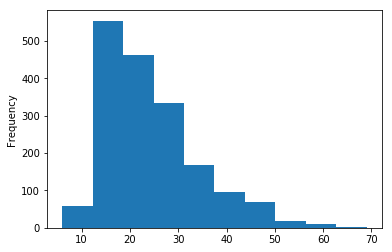

In [22]:
# wall_punch['age'].mean()
# #distribution=histogram

wall_punch['age'].plot.hist()

# Which months are the most popular for wall punching?

The month is hidden inside of the `trmt_date` column - you'll need to extract it. To check, January should have 27109 cases.

In [23]:
# #df.trmt_date is a string
df.trmt_date.str.extract("(\d\d)/\d\d/\d\d\d\d").value_counts().sort_index()

# df.narr1.str.extract("FELL OFF (\w+)").dropna()
# #put parentheses around part you want to keep

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


01    27109
02    23703
03    29220
04    30154
05    34066
06    31315
07    32184
08    32917
09    32473
10    30587
11    27154
12    26845
Name: trmt_date, dtype: int64

## Graph the amount of wall punching in each month

Having numbers on the x axis (1-12) is fine.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


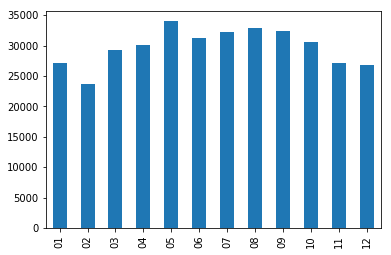

In [24]:
df.trmt_date.str.extract("(\d\d)/\d\d/\d\d\d\d").value_counts().sort_index().plot(kind='bar')

## Sort the graph so that the months are in order from Jan-Dec (or 01-12)

In [25]:
# what month is most common for air conditioner related injuries
# #0381 is product code for air conditioning
# #.astype str means turn this into a string
# #.str means I'm giving you a string method to use on it

In [27]:
# df[df['prod1']==381].trmt_date.str.extract("(\d\d)/\d\d/\d\d\d\d").value_counts().sort_index().plot(kind='barh')

#0381 is product code for air conditioning
#.astype str means turn this into a string
#.str means I'm giving you a string method to use on it 

# df.prod1.str.pad(4, fillchar='0')
# df[df['prod1']== '0381'.value_counts()

## Find what else people punched using the prod1 and prod2 columns.

Look at the top 10 for each separately.

In [ ]:
df[df['narr1'].str.contains("PUNCH")]['prod1'].value_counts().head(10)
    
#1842 is stairs
#4076 is beds
#look at documentation to see what prod codes equal 
#pad all with leading zeroes



In [ ]:
# df.prod1.dropna(np.naan, 0000, replace)(ascending=True)
# # fill_value=0

In [ ]:
df[df['narr1'].str.contains("PUNCH")]['prod2'].value_counts().head(10)a

In [ ]:
#pad with zero

# what month is most common for air conditioner related injuries

#0381 is product code for air conditioning
#.astype str means turn this into a string
#.str means I'm giving you a string method to use on it 

# df.prod1.str.pad(4, fillchar='0')
# df[df['prod1']== '0381'.value_counts()

In [ ]:
df[(df['prod1']=='381')|(df['prod2']=='381')]['trmt_date'].str.extract("(\d\d)/\d\d/\d\d\d\d").value_counts()

In [ ]:
df['prod1'].dtypes
#object==string

## Uh, they're the same!

The order of `prod1` and `prod2` don't actually matter!

> When only one product is associated with an injury, place the product code for that product in the space allocated for "First Product Code" and fill in the "Second Product Code" spaces with 4 zeros (0000).
When two products are associated with an injury, either product may be coded as the first product and the other as the second product.
>
> Example: An 11-year old boy riding a bicycle ran into a swing. Code: Product 1 = 5040 (bicycle) and Product 2 = 3246 (swings) or
>
> Code: Product 1 = 3246 (swings) and Product 2 = 5040 (bicycle)

## Okay, okay, there’s no difference between prod1 and prod2, so you should add their frequencies together for an overall count!

It's *almost* as easy as adding together the `value_counts()`.

Take a look at the air conditioner question and the `.value_counts()` you just did, though, to see why combining them might not be that simple. **What is different about `prod1` and `prod2`?** You probably have to go all the way back up to where you read the file in to make them match.

In [38]:
#prod 1 and prod 2 are strings, see where I imported the file

# df['prod2'].value_counts()
# .astype str means turn this into a string
df3=df['prod1'].value_counts().add(df['prod2'].value_counts(), fill_value=0).sort_values(ascending = False)

In [39]:
df3.fillna(0000)

1807    41907.0
1842    30247.0
4076    18088.0
1205    14293.0
5040    12898.0
1211    11755.0
1884     9665.0
4057     9441.0
4074     9041.0
1893     8263.0
611      7817.0
464      7607.0
3299     7325.0
1267     7212.0
679      5561.0
1615     4943.0
4056     3975.0
676      3920.0
4078     3855.0
1817     3413.0
604      3401.0
1141     3386.0
1233     3269.0
5041     3118.0
1871     3008.0
1616     3007.0
649      2906.0
1333     2895.0
1819     2865.0
1894     2716.0
         ...   
915         2.0
3282        2.0
1274        2.0
3230        2.0
1314        2.0
984         1.0
125         1.0
1350        1.0
958         1.0
932         1.0
807         1.0
558         1.0
556         1.0
533         1.0
5013        1.0
462         1.0
241         1.0
240         1.0
236         1.0
223         1.0
213         1.0
212         1.0
1739        1.0
1618        1.0
1539        1.0
1517        1.0
1515        1.0
1441        1.0
139         1.0
102         1.0
Length: 763, dtype: floa

## Turn that into a dataframe

Use `.reset_index()` on the result to turn it into a dataframe. Rename your columns to be `product_code` and `injury_count`.

In [43]:
# df3.reset_index(inplace=True)

# df3 = df3.reset_index()
# But if you need new column, use:

# df3['product_code']=df3.index()
df3 = df3.reset_index()

In [48]:
df3.columns = ['product_code','injury_count']

In [49]:
df3

,product_code,injury_count
0,1807,41907.0
1,1842,30247.0
2,4076,18088.0
3,1205,14293.0
4,5040,12898.0
5,1211,11755.0
6,1884,9665.0
7,4057,9441.0
8,4074,9041.0
9,1893,8263.0


## Fix the product codes

Uh, wait, look at those product codes. "102" shouldn't be possible, it should be `0102` - this actually doesn't have to do with coding, it has to do with *the data doesn't match the codebook*.

### Add zeroes to the left of the product code until it is 4 characters long

In [51]:
df3['product_code']=df3['product_code'].apply(lambda x: x.zfill(4))

In [52]:
df3

,product_code,injury_count
0,1807,41907.0
1,1842,30247.0
2,4076,18088.0
3,1205,14293.0
4,5040,12898.0
5,1211,11755.0
6,1884,9665.0
7,4057,9441.0
8,4074,9041.0
9,1893,8263.0


## Get meaningful names for "product code"

Join with `categories-cleaned.txt` to turn the codes into actual words. **When you read in `categories-cleaned.txt`, make sure it has 803 rows and 2 columns.**

In [ ]:
#join with .txt file 

In [70]:
f = open('categories-cleaned.txt')
cat_dict = {}

for line in f:
    key , val = line.strip().split(',',1)
    cat_dict[key] = val

In [83]:
df4 = pd.DataFrame.from_dict(cat_dict.items())

ValueError: DataFrame constructor not properly called!

In [82]:
df4

,0,1,2,3,4,5,6,7,8,9,...,793,794,795,796,797,798,799,800,801,802
0,"(0102, ""Wringer washing machines"")","(0106, ""Electric clothes dryers without washers"")","(0107, ""Gas clothes dryers without washers"")","(0110, ""Electric heating pads"")","(0112, ""Sewing machines or accessories"")","(0113, ""Floor buffers or waxers"")","(0114, ""Rug shampooers"")","(0115, ""Vacuum cleaners"")","(0116, ""Electric brooms"")","(0118, ""Gas water heaters"")",...,"(5035, ""Minibikes, powered"")","(5036, ""Two-wheeled, powered, off-road vehicle...","(5037, ""Hammocks"")","(5038, ""Fitness/activity tracker, personal (in...","(5040, ""Bicycles or accessories (excluding mou...","(5041, ""Baseball (activity, apparel or equipme...","(5042, ""Scooters/skateboards, powered"")","(5043, ""Portable swimming pools"")","(5044, ""Utility vehicles"")","(5555, ""Substance ingested or inhaled by a vic..."


In [81]:
df4.columns = ['product_code2','category_name']

ValueError: Length mismatch: Expected axis has 803 elements, new values have 2 elements

### Confirm that it worked by seeing if product code '0102' gives you 'Wringer washing machines"

## Graph the top 10 most popular products for injuries 

In [ ]:
df4['product_code'].value_counts().head().plot(kind='bar')